In [1]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
boston = load_boston()
boston.data.shape

(506, 13)

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data['price'] = boston.target

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# creating pairplots in seaborn to do some exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



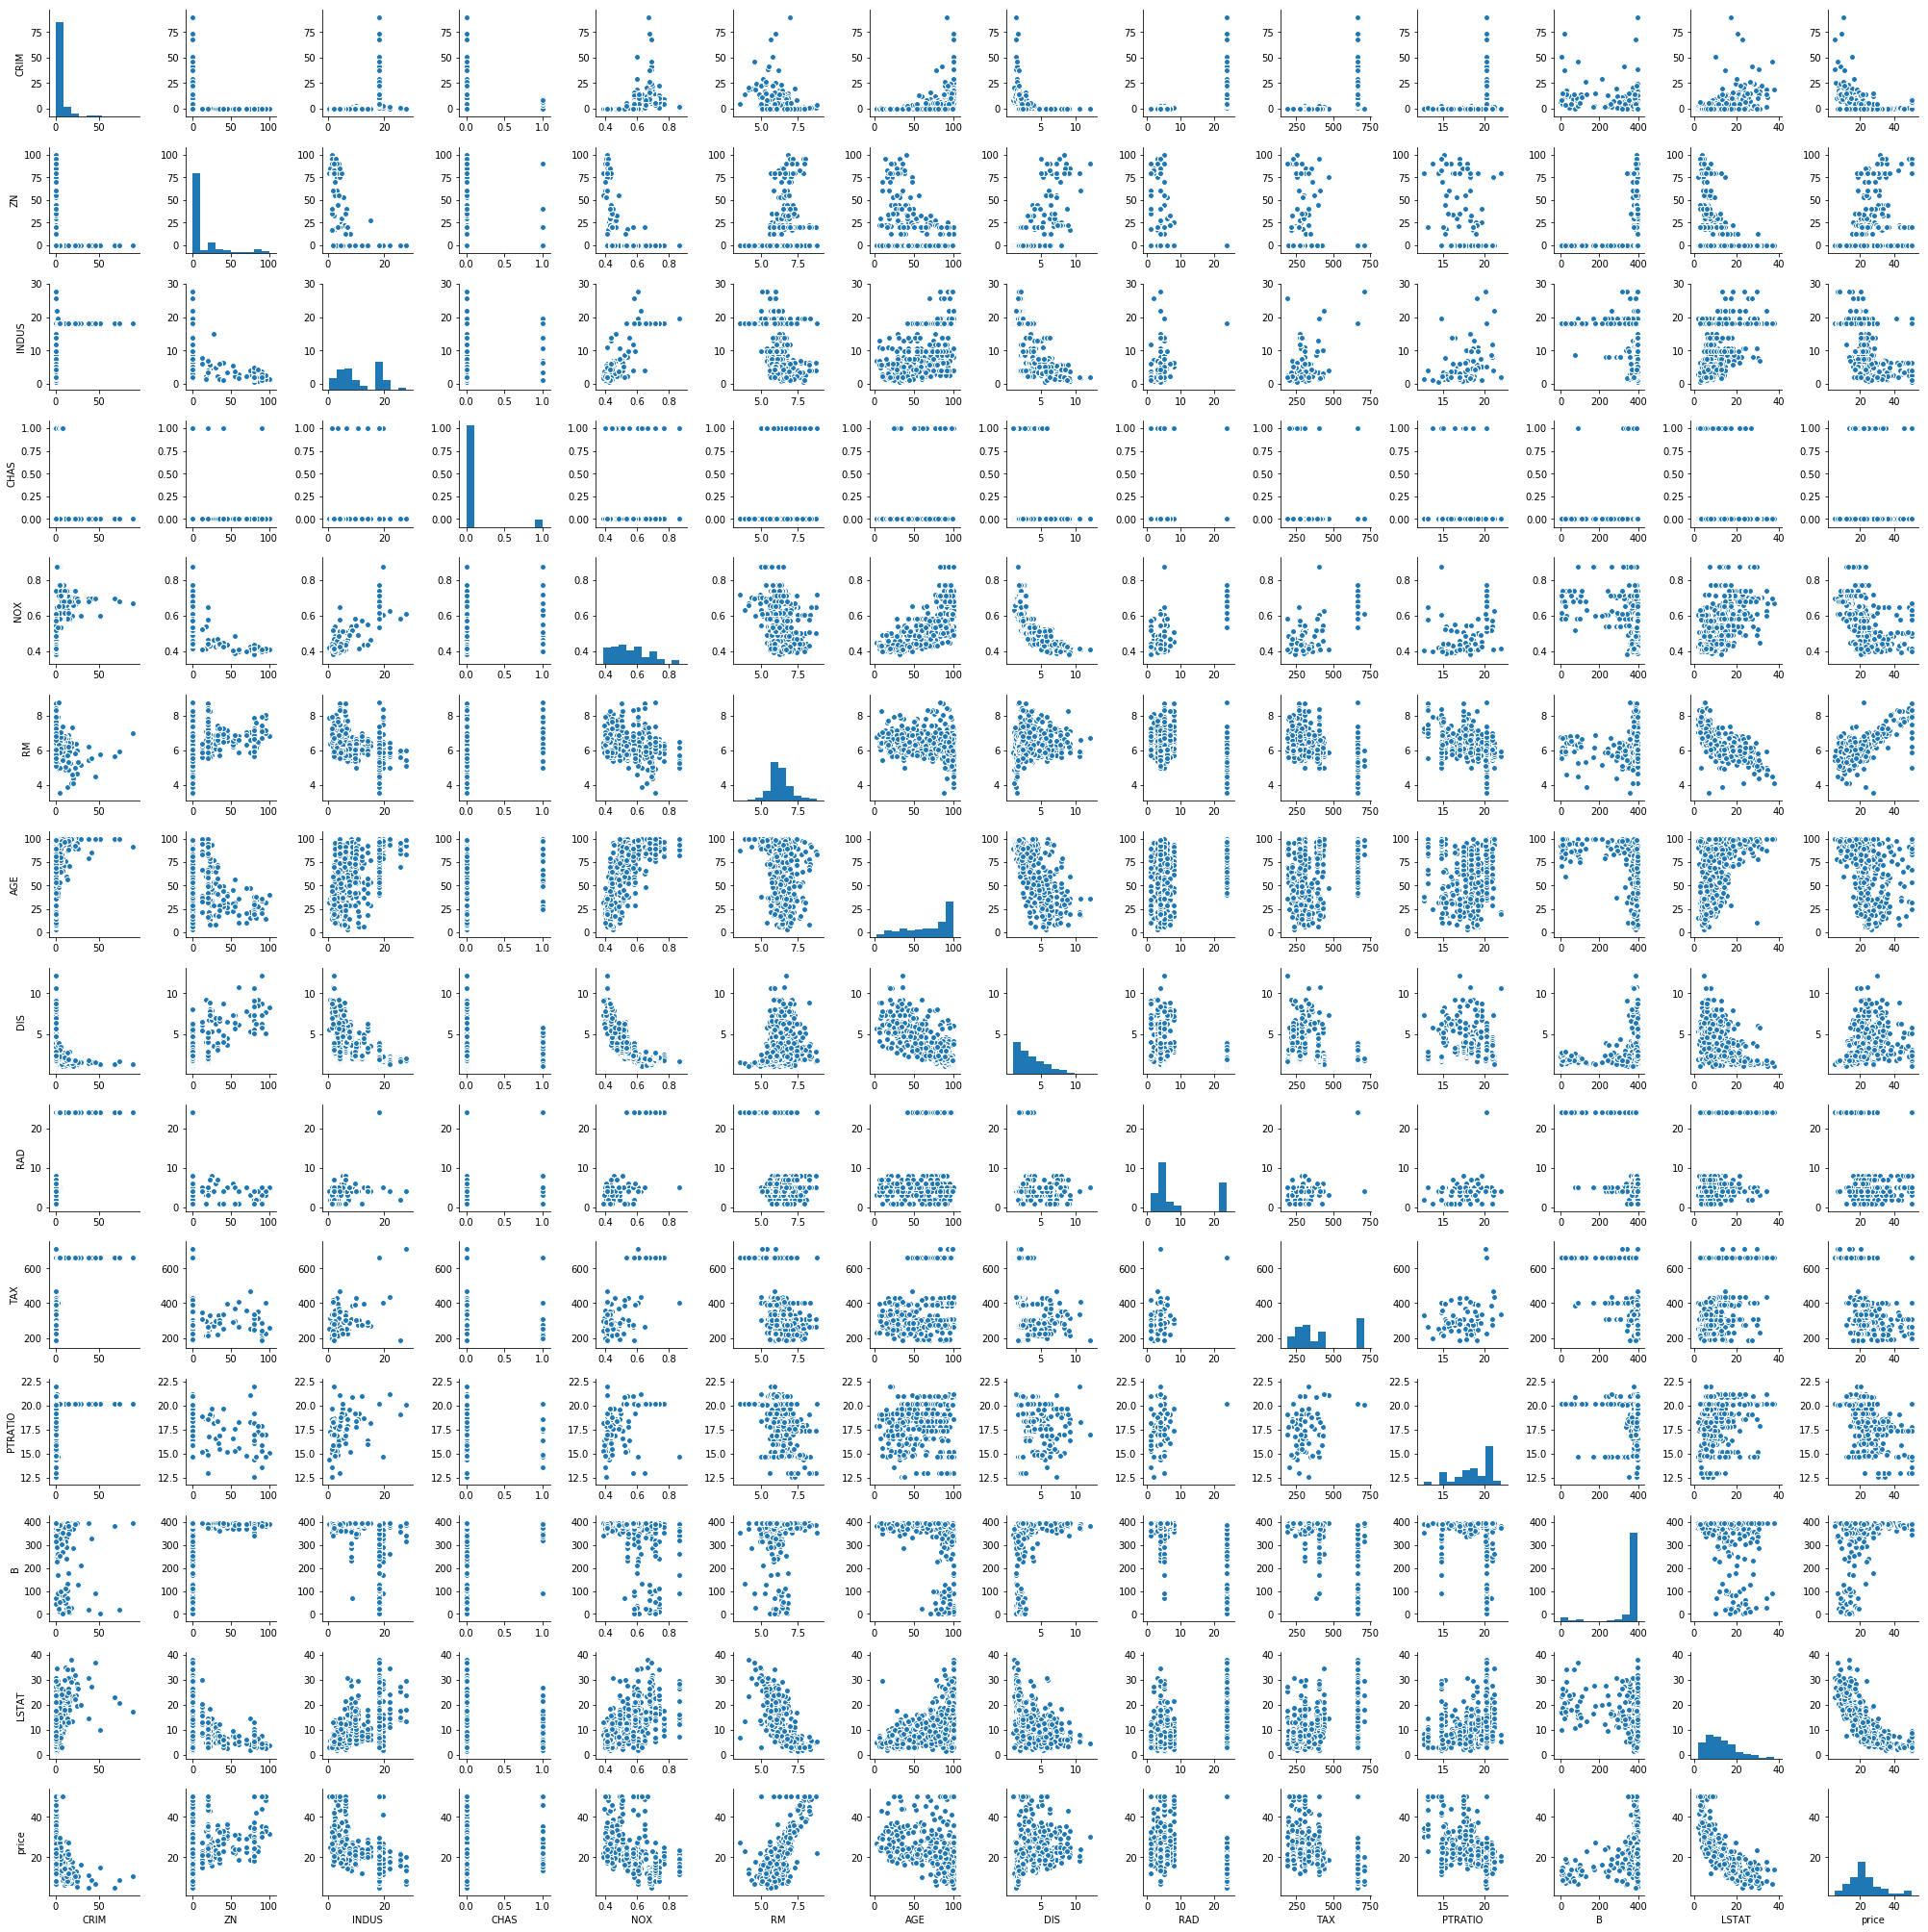

In [8]:
sns.pairplot(data, size = 2);

In [26]:
# taking out most correlated attributes

rm = data.loc[:, 'RM']
lstat = data.loc[:,'LSTAT']
avg_price = data.loc[:,'price']

df = pd.DataFrame({'Avg_rooms_per_house':rm,'% lower status of the population':lstat,'avg_price':avg_price})
df.head()

,% lower status of the population,Avg_rooms_per_house,avg_price
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


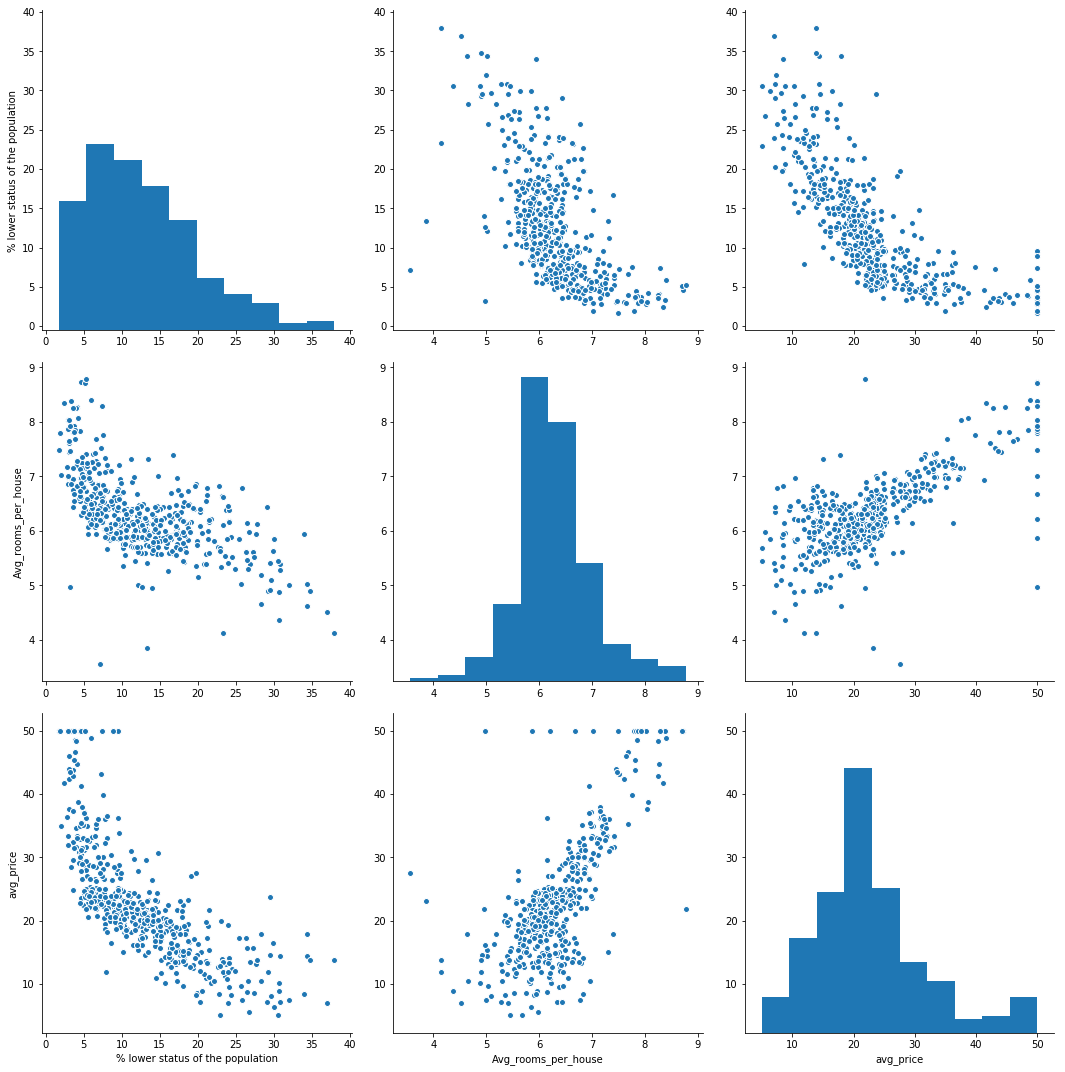

In [27]:
sns.pairplot(df, size = 5);

In [47]:
X = pd.DataFrame({'Avg_rooms_per_house':rm,'% lower status of the population':lstat})

In [48]:
y = pd.DataFrame({'avg_price':avg_price})

In [49]:
X.head()

,% lower status of the population,Avg_rooms_per_house
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [50]:
y.head()

,avg_price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
scores = cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=10)
print(scores)
scores.mean()

[ -11.80465087   -9.42518878  -17.67321251  -49.70991186  -28.66074706
  -39.59205168  -18.83092317 -141.06027736  -52.23887102  -14.85244304]


-38.384827734159863

In [61]:
seclm = LinearRegression(normalize=True)
seclm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)